In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
labels_paths = pd.read_csv('ptbxl_database.csv')
labels_paths = labels_paths[['scp_codes', 'filename_hr']]
labels_paths.rename(columns={'scp_codes': 'label',
                    'filename_hr': 'path'}, inplace=True)
labels_paths.head()

,label,path
0,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",records500/00000/00001_hr
1,"{'NORM': 80.0, 'SBRAD': 0.0}",records500/00000/00002_hr
2,"{'NORM': 100.0, 'SR': 0.0}",records500/00000/00003_hr
3,"{'NORM': 100.0, 'SR': 0.0}",records500/00000/00004_hr
4,"{'NORM': 100.0, 'SR': 0.0}",records500/00000/00005_hr


In [3]:
labels_paths['first_value'] = labels_paths['label'].str.extract(r"'([^']*)'")

# Update the 'label' column with the extracted values
labels_paths['label'] = labels_paths['first_value'].fillna(
    labels_paths['label'])

# Drop the 'first_value' column as it's no longer needed
labels_paths.drop(columns=['first_value'], inplace=True)

labels_paths

,label,path
0,NORM,records500/00000/00001_hr
1,NORM,records500/00000/00002_hr
2,NORM,records500/00000/00003_hr
3,NORM,records500/00000/00004_hr
4,NORM,records500/00000/00005_hr
...,...,...
21832,NDT,records500/21000/21833_hr
21833,NORM,records500/21000/21834_hr
21834,ISCAS,records500/21000/21835_hr
21835,NORM,records500/21000/21836_hr


In [4]:
file_df = pd.DataFrame(labels_paths)


# Plot the distribution of labels
plt.figure(figsize=(8, 6))
dist = file_df['label'].value_counts()

dist = pd.DataFrame(dist)
dist.reset_index(inplace=True)

dist

,count
label,
NORM,9528
IMI,2329
ASMI,1883
NDT,1477
LVH,1215
LAFB,690
IRBBB,504
CLBBB,500
NST_,463


<Figure size 800x600 with 0 Axes>

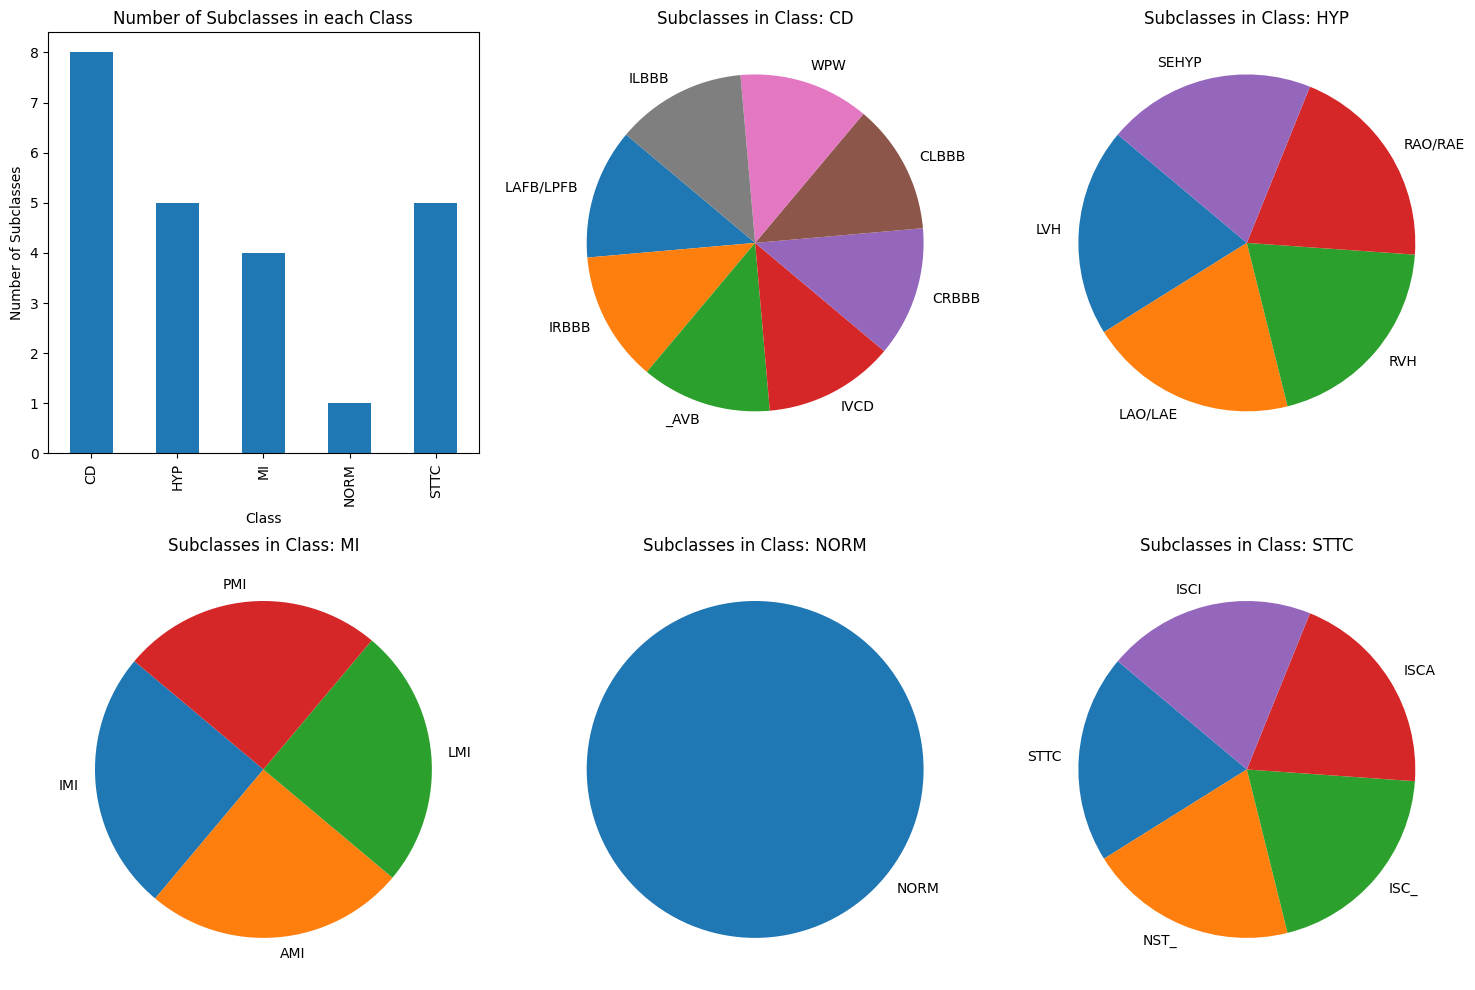

,class,subclass
10,CD,IRBBB
33,CD,ILBBB
15,CD,CLBBB
14,CD,CRBBB
8,CD,LAFB/LPFB
32,CD,WPW
11,CD,_AVB
12,CD,IVCD
30,HYP,RAO/RAE
17,HYP,LAO/LAE


In [5]:
# Read the CSV file
class_subclass = pd.read_csv('scp_statements.csv')

# Select columns 'diagnostic_class' and 'diagnostic_subclass'
class_subclass = class_subclass[['diagnostic_class', 'diagnostic_subclass']]

# Rename columns
class_subclass.rename(columns={
                      'diagnostic_class': 'class', 'diagnostic_subclass': 'subclass'}, inplace=True)

# Remove rows with missing values
class_subclass.dropna(inplace=True)

# Group by 'class' and then list all unique 'subclass' in each 'class'
class_subclass_grouped = class_subclass.groupby('class')['subclass'].unique()

# Plot the grouped data as a bar chart and donut charts for each class as subplots
num_classes = len(class_subclass_grouped)
num_rows = 2
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Plot the bar chart for number of subclasses in each class
class_subclass_grouped.apply(len).plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_xlabel('Class')
axs[0, 0].set_ylabel('Number of Subclasses')
axs[0, 0].set_title('Number of Subclasses in each Class')

# Plot donut charts for subclasses within each class
for i, (index, row) in enumerate(class_subclass_grouped.items()):
    subclass_counts = dict(Counter(row))
    labels = subclass_counts.keys()
    sizes = subclass_counts.values()

    row_index = (i + 1) // num_cols
    col_index = (i + 1) % num_cols

    axs[row_index, col_index].pie(sizes, labels=labels, startangle=140)
    axs[row_index, col_index].set_title(f'Subclasses in Class: {index}')

# Hide empty subplots if there are fewer than 6 classes
for i in range(num_classes + 1, num_rows * num_cols):
    axs[i // num_cols, i % num_cols].axis('off')

plt.tight_layout()
plt.show()

class_subclass = class_subclass.drop_duplicates(subset=['class', 'subclass'])
class_subclass.sort_values(by='class', inplace=True)
class_subclass.reset_index()

class_subclass

In [6]:
import pandas as pd

# Assuming df_LabelPath and df_ClassSubclass are your dataframes
# Merge the dataframes on subclass if available, otherwise on class
merged_df = pd.merge(labels_paths, class_subclass,
                     left_on='label', right_on='class', how='left')

# Fill missing values in 'Class' column with values from 'Label' column
merged_df['class'].fillna(merged_df['label'], inplace=True)

# Drop unnecessary columns
merged_df.drop(['label', 'subclass'], axis=1, inplace=True)

# Rename the 'Class' column to 'Label'
merged_df.rename(columns={'class': 'subclass'}, inplace=True)

# Now merged_df contains the desired result with labels replaced by corresponding classe

# Merge DataFrames based on 'subclass' column
merged_df = pd.merge(merged_df, class_subclass, on='subclass', how='left')
merged_df

C:\Users\Perfect computers\AppData\Local\Temp\ipykernel_15264\1858707271.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['class'].fillna(merged_df['label'], inplace=True)


,path,subclass,class
0,records500/00000/00001_hr,NORM,NORM
1,records500/00000/00002_hr,NORM,NORM
2,records500/00000/00003_hr,NORM,NORM
3,records500/00000/00004_hr,NORM,NORM
4,records500/00000/00005_hr,NORM,NORM
...,...,...,...
21832,records500/21000/21833_hr,NDT,NaN
21833,records500/21000/21834_hr,NORM,NORM
21834,records500/21000/21835_hr,ISCAS,NaN
21835,records500/21000/21836_hr,NORM,NORM


In [7]:
id_data_frame = pd.read_excel('D:\\Semester 7\\FYP\\id.xlsx')
id_data_frame.rename(columns={'diagnostic_class': 'class'}, inplace=True)
id_data_frame

,id,class
0,NDT,STTC
1,NST_,STTC
2,DIG,STTC
3,LNGQT,STTC
4,NORM,NORM
5,IMI,MI
6,ASMI,MI
7,LVH,HYP
8,LAFB,CD
9,ISC_,STTC


In [8]:
import pandas as pd


# Merge based on 'id' column to fill in empty values in df1['class']
merged_df = merged_df.merge(
    id_data_frame, left_on='subclass', right_on='id', how='left')


print(merged_df)

                            path subclass class_x     id class_y
0      records500/00000/00001_hr     NORM    NORM   NORM    NORM
1      records500/00000/00002_hr     NORM    NORM   NORM    NORM
2      records500/00000/00003_hr     NORM    NORM   NORM    NORM
3      records500/00000/00004_hr     NORM    NORM   NORM    NORM
4      records500/00000/00005_hr     NORM    NORM   NORM    NORM
...                          ...      ...     ...    ...     ...
21832  records500/21000/21833_hr      NDT     NaN    NDT    STTC
21833  records500/21000/21834_hr     NORM    NORM   NORM    NORM
21834  records500/21000/21835_hr    ISCAS     NaN  ISCAS    STTC
21835  records500/21000/21836_hr     NORM    NORM   NORM    NORM
21836  records500/21000/21837_hr     NORM    NORM   NORM    NORM

[21837 rows x 5 columns]


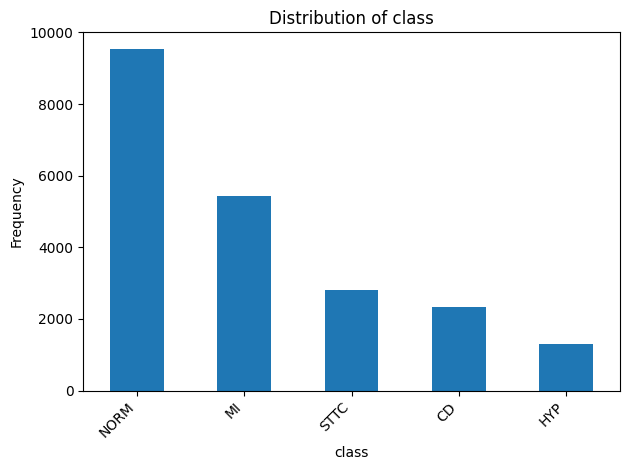

In [9]:
# Plot the distribution of labels
label_counts = merged_df['class_y'].value_counts()
label_counts.plot(kind='bar')
plt.xlabel('class')
plt.ylabel('Frequency')
plt.title('Distribution of class')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [10]:
import pandas as pd

# Assuming merged_df is already defined with 'class_y' column
# Count the occurrences of each class
class_counts = merged_df['class_y'].value_counts()

# Print the count for each class
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Count: {count}")

Class: NORM, Count: 9528
Class: MI, Count: 5439
Class: STTC, Count: 2810
Class: CD, Count: 2324
Class: HYP, Count: 1310


In [11]:
import pandas as pd

# Assuming your DataFrame is named df
# Drop columns 'subclass', 'id', and 'class_x'
merged_df.drop(['subclass', 'id', 'class_x'], axis=1, inplace=True)
# Remove rows with missing values in 'class_y' column
merged_df.dropna(subset=['class_y'], inplace=True)
# Rename 'class_y' to 'class'
merged_df.rename(columns={'class_y': 'class'}, inplace=True)

# If you want to reset the index after dropping rows
merged_df.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
merged_df

,path,class
0,records500/00000/00001_hr,NORM
1,records500/00000/00002_hr,NORM
2,records500/00000/00003_hr,NORM
3,records500/00000/00004_hr,NORM
4,records500/00000/00005_hr,NORM
...,...,...
21406,records500/21000/21833_hr,STTC
21407,records500/21000/21834_hr,NORM
21408,records500/21000/21835_hr,STTC
21409,records500/21000/21836_hr,NORM


In [ ]:
merged_df.to_csv(
    'D:\\Semester 7\\FYP\\preprocessing\\final_labels.csv', index=False)